In [1]:
import pysgpp
import pandas as pd
import matplotlib.pyplot as plt

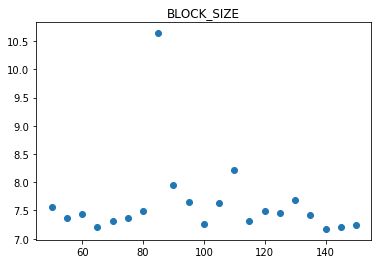

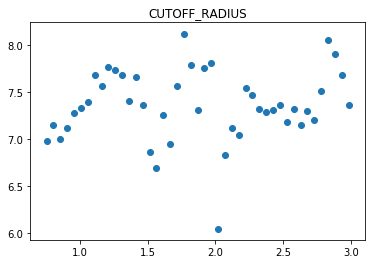

In [2]:
for t in ['BLOCK_SIZE', 'CUTOFF_RADIUS']:
    df = pd.read_csv('{0}_times.csv'.format(t), header = None, names = ['radius', 'time'])
    plt.scatter(df.radius, df.time);
    plt.title(t)
    plt.show()

In [3]:
f = lambda x0, x1: 16.0 * (x0 - 1.0) * x0 * (x1 - 1.0) * x1

In [4]:
dim = 2
grid = pysgpp.Grid.createLinearGrid(dim)

In [5]:
gridStorage = grid.getStorage()
print "dimensionality:         {}".format(gridStorage.getDimension())


dimensionality:         2


In [6]:
level = 3
grid.getGenerator().regular(level)
print "number of grid points:  {}".format(gridStorage.getSize())


number of grid points:  17


In [7]:
alpha = pysgpp.DataVector(gridStorage.getSize())
alpha.setAll(0.0)
print "length of alpha vector: {}".format(len(alpha))


length of alpha vector: 17


In [8]:
for i in xrange(gridStorage.getSize()):
  gp = gridStorage.getPoint(i)
  alpha[i] = f(gp.getStandardCoordinate(0), gp.getStandardCoordinate(1))
print "alpha before hierarchization: {}".format(alpha)

alpha before hierarchization: [1.00000000000000000000e+00, 7.50000000000000000000e-01, 7.50000000000000000000e-01, 4.37500000000000000000e-01, 9.37500000000000000000e-01, 9.37500000000000000000e-01, 4.37500000000000000000e-01, 7.50000000000000000000e-01, 7.50000000000000000000e-01, 4.37500000000000000000e-01, 9.37500000000000000000e-01, 9.37500000000000000000e-01, 4.37500000000000000000e-01, 5.62500000000000000000e-01, 5.62500000000000000000e-01, 5.62500000000000000000e-01, 5.62500000000000000000e-01]


In [10]:
pysgpp.createOperationHierarchisation(grid).doHierarchisation(alpha)
print "alpha after hierarchization:  {}".format(alpha)

alpha after hierarchization:  [1.00000000000000000000e+00, -2.50000000000000000000e-01, -2.50000000000000000000e-01, -6.25000000000000000000e-02, -5.62500000000000000000e-01, -5.62500000000000000000e-01, -6.25000000000000000000e-02, -2.50000000000000000000e-01, -2.50000000000000000000e-01, -6.25000000000000000000e-02, -5.62500000000000000000e-01, -5.62500000000000000000e-01, -6.25000000000000000000e-02, 6.25000000000000000000e-02, 6.25000000000000000000e-02, 6.25000000000000000000e-02, 6.25000000000000000000e-02]


In [11]:
p = pysgpp.DataVector(dim)
p[0] = 0.52
p[1] = 0.73
opEval = pysgpp.createOperationEval(grid)
print "u(0.52, 0.73) = {}".format(opEval.eval(alpha, p))


u(0.52, 0.73) = 0.1564
